In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import matplotlib.patches as patches
from aif360.algorithms.preprocessing import Reweighing
#from packages import *
#from ml_fairness import *
import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import Markdown, display

In [17]:
bank = pd.read_csv('../../Data/bank-additional-full.csv', sep = ';')
bank.head(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
len(bank)


41188

In [19]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [20]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [21]:
print(bank['job'].unique())
print(bank['marital'].unique())
print(bank['education'].unique())
print(bank['housing'].unique())
print(bank['loan'].unique())
print(bank['contact'].unique())
print(bank['month'].unique())
print(bank['day_of_week'].unique())
print(bank['campaign'].unique())


['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]


In [22]:
print('Min age: ', bank['age'].max())
print('Max age: ', bank['age'].min())
bank.isnull().any()


Min age:  98
Max age:  17


age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

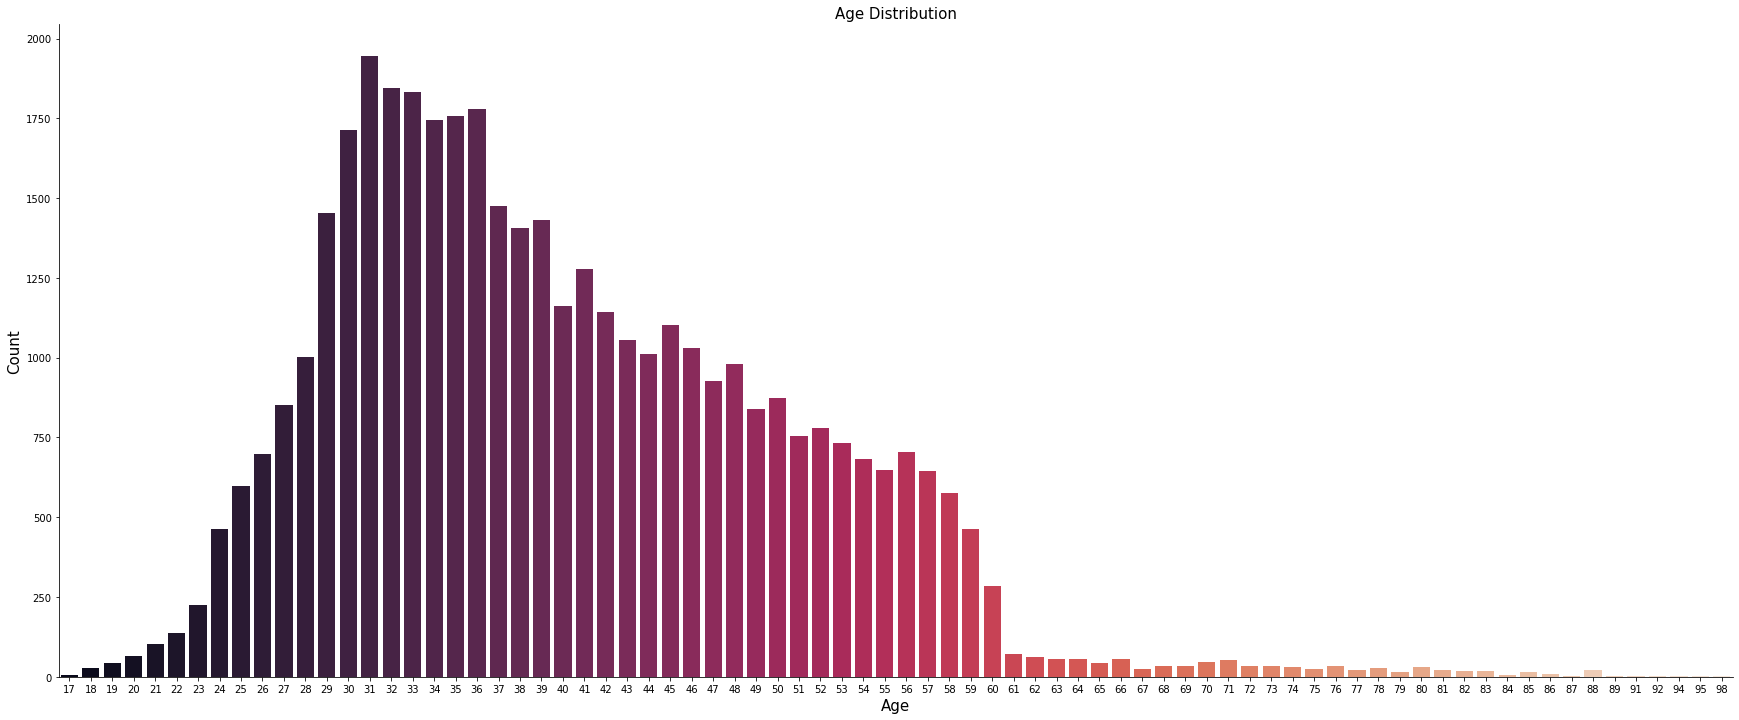

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.countplot(x = 'age',  palette="rocket", data = bank)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Distribution', fontsize=15)
sns.despine()

In [25]:
### finding outliers based on age
# Method 1- Z score
threshold = 3
ys= bank['age']
mean_y = np.mean(ys)
stdev_y = np.std(ys)
fence_low  = mean_y-3*stdev_y
fence_high = mean_y+3*stdev_y
bank1= bank.loc[(bank['age'] > fence_low) & (bank['age'] < fence_high)]
print('Zscore lower bound and upper bound are', fence_low, 'and', fence_high, 'respectively')


# Method 2- IQR method
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    print('IQR lower bound and upper bound are', fence_low, 'and', fence_high, 'respectively')
    return df_out
bank2= remove_outlier(bank, 'age')

# we will use IQR here

Zscore lower bound and upper bound are 8.760689990427288 and 71.28743082145968 respectively
IQR lower bound and upper bound are 9.5 and 69.5 respectively


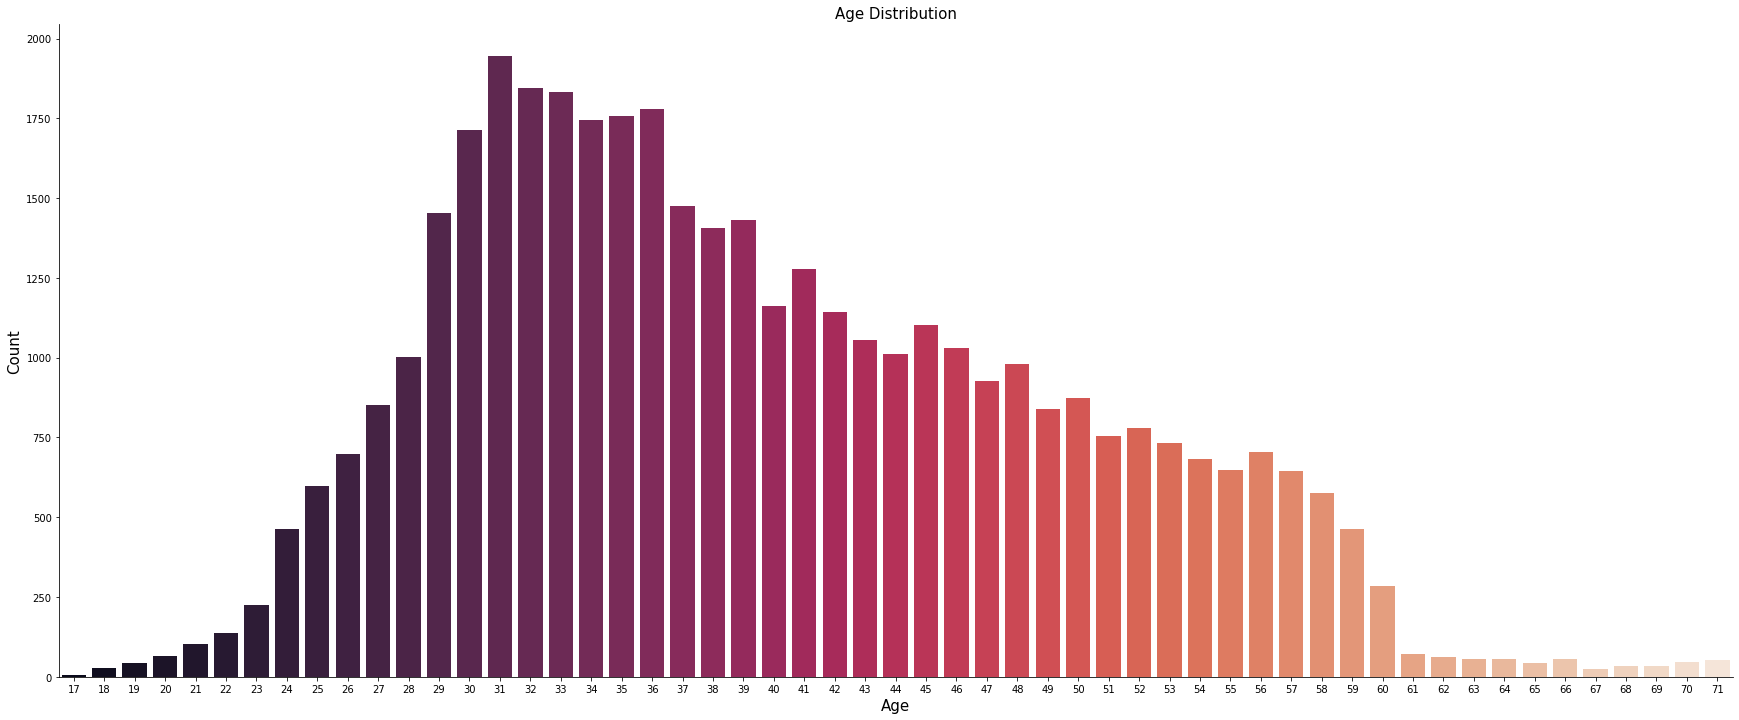

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.countplot(x = 'age',  palette="rocket", data = bank1)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Distribution', fontsize=15)
sns.despine()


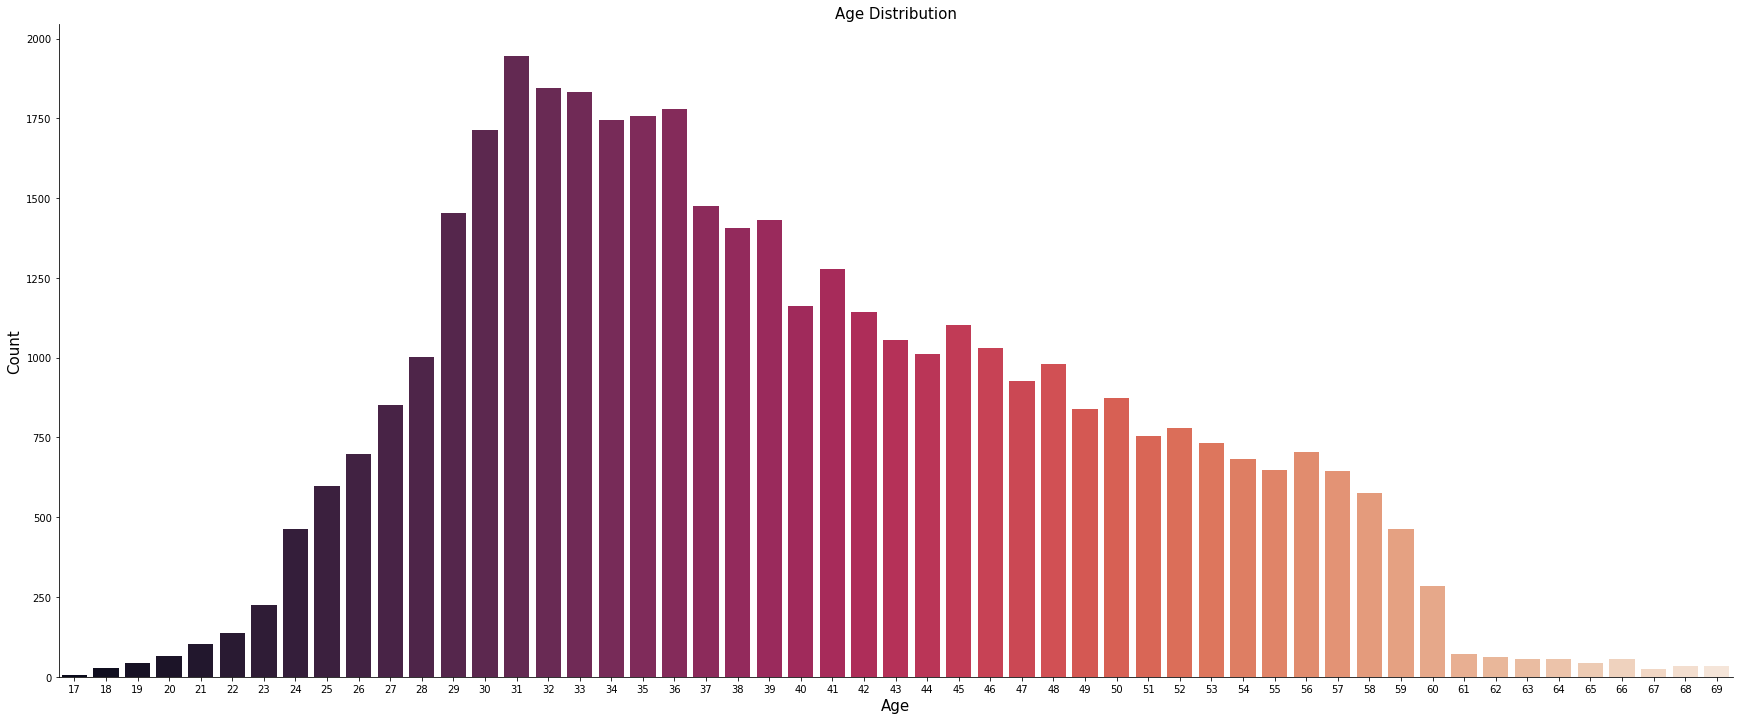

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.countplot(x = 'age',  palette="rocket", data = bank2)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Distribution', fontsize=15)
sns.despine()


In [28]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] < 25, 'age'] = 0
    dataframe.loc[dataframe['age'] >= 25, 'age'] = 1
           
    return dataframe

age(bank2);


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


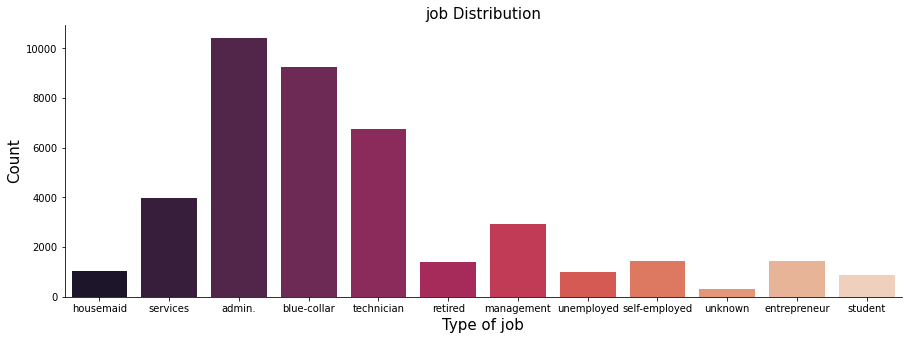

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'job',  palette="rocket", data = bank1)
ax.set_xlabel('Type of job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('job Distribution', fontsize=15)
sns.despine()

In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()


In [31]:
labelencoder_X = LabelEncoder()

In [32]:
labelencoder_X.fit(bank2['job'])
bank2['job'] = labelencoder_X.transform(bank2['job'])
bank2.head(10)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,3,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,7,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,1,7,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,1,0,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,1,7,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,1,7,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,1,0,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,1,1,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,0,9,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,1,7,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


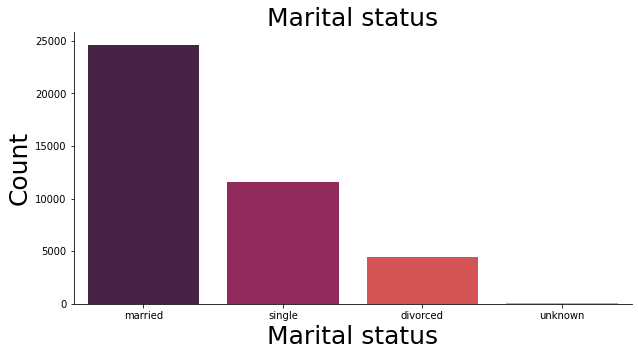

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital',  palette="rocket", data = bank2)
ax.set_xlabel('Marital status', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('Marital status', fontsize=25)
sns.despine()

In [34]:
labelencoder_X.fit(bank2['marital'])
bank2['marital'] = labelencoder_X.transform(bank2['marital'])
bank2.head(10)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,3,1,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,7,1,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,1,7,1,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,1,0,1,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,1,7,1,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,1,7,1,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,1,0,1,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,1,1,1,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,0,9,2,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,1,7,2,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


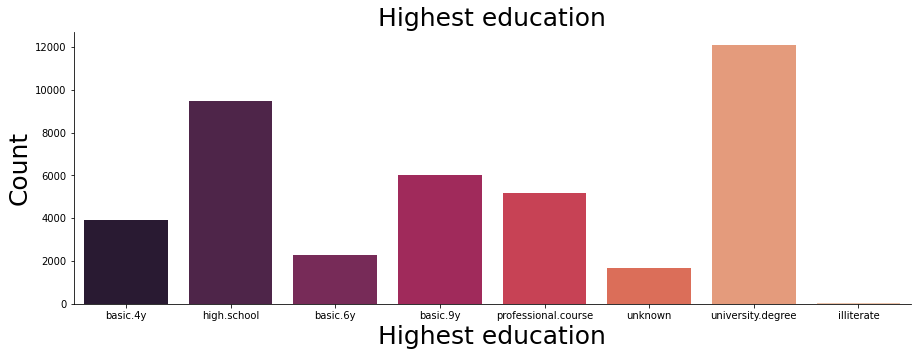

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'education',  palette="rocket", data = bank2)
ax.set_xlabel('Highest education', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('Highest education', fontsize=25)
sns.despine()

In [36]:
labelencoder_X.fit(bank2['education'])
bank2['education'] = labelencoder_X.transform(bank2['education'])
bank2.head(10)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,3,1,0,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,7,1,3,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,1,7,1,3,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,1,0,1,1,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,1,7,1,3,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,1,7,1,2,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,1,0,1,5,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,1,1,1,7,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,0,9,2,5,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,1,7,2,3,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


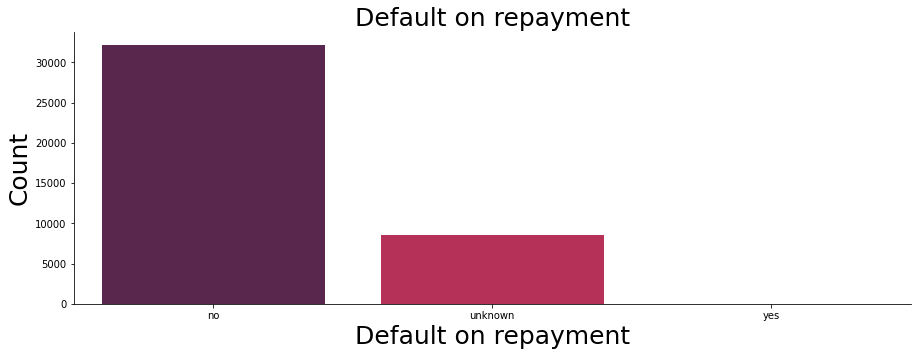

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'default',  palette="rocket", data = bank2)
ax.set_xlabel('Default on repayment', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('Default on repayment', fontsize=25)
sns.despine()

In [38]:
labelencoder_X.fit(bank2['default'])
bank2['default'] = labelencoder_X.transform(bank2['default'])
bank2.head(10)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,3,1,0,0,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,7,1,3,1,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,1,7,1,3,0,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,1,0,1,1,0,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,1,7,1,3,0,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,1,7,1,2,1,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,1,0,1,5,0,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,1,1,1,7,1,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,0,9,2,5,0,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,1,7,2,3,0,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


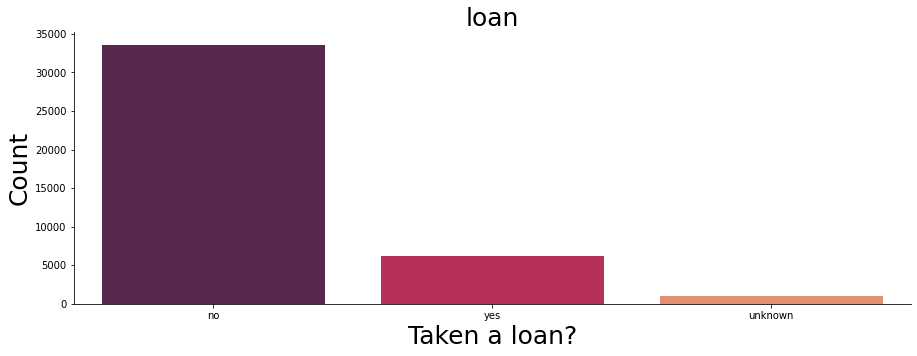

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'loan',  palette="rocket", data = bank2)
ax.set_xlabel('Taken a loan?', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('loan', fontsize=25)
sns.despine()

In [40]:
labelencoder_X.fit(bank2['loan'])
bank2['loan'] = labelencoder_X.transform(bank2['loan'])
bank2.head(10)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,3,1,0,0,no,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,7,1,3,1,no,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,1,7,1,3,0,yes,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,1,0,1,1,0,no,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,1,7,1,3,0,no,2,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,1,7,1,2,1,no,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,1,0,1,5,0,no,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,1,1,1,7,1,no,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,0,9,2,5,0,yes,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,1,7,2,3,0,yes,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


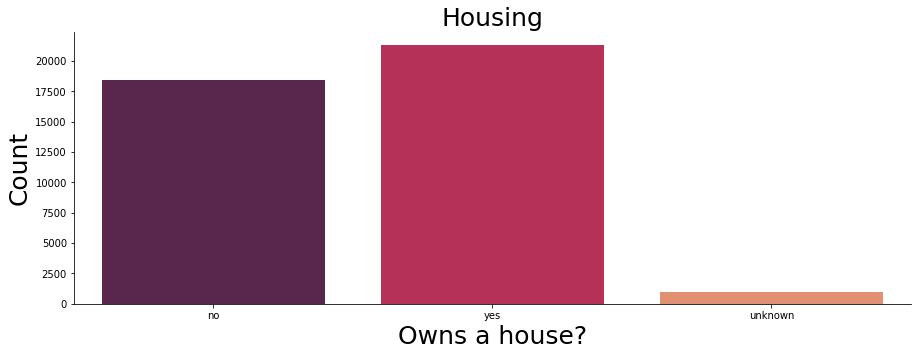

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'housing',  palette="rocket", data = bank2)
ax.set_xlabel('Owns a house?', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('Housing', fontsize=25)
sns.despine()

In [42]:
labelencoder_X.fit(bank2['housing'])
bank2['housing'] = labelencoder_X.transform(bank2['housing'])
bank2.head(10)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,3,1,0,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,7,1,3,1,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,1,7,1,3,0,2,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,1,0,1,1,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,1,7,1,3,0,0,2,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,1,7,1,2,1,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,1,0,1,5,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,1,1,1,7,1,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,0,9,2,5,0,2,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,1,7,2,3,0,2,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


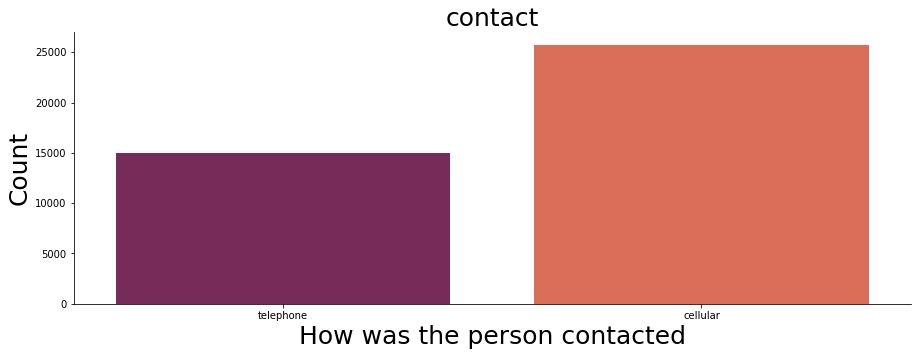

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'contact',  palette="rocket", data = bank2)
ax.set_xlabel('How was the person contacted', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('contact', fontsize=25)
sns.despine()

In [44]:
labelencoder_X.fit(bank2['contact'])
bank2['contact'] = labelencoder_X.transform(bank2['contact'])
bank2.head(10)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,3,1,0,0,0,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,7,1,3,1,0,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,1,7,1,3,0,2,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,1,0,1,1,0,0,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,1,7,1,3,0,0,2,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,1,7,1,2,1,0,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,1,0,1,5,0,0,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,1,1,1,7,1,0,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,0,9,2,5,0,2,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,1,7,2,3,0,2,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


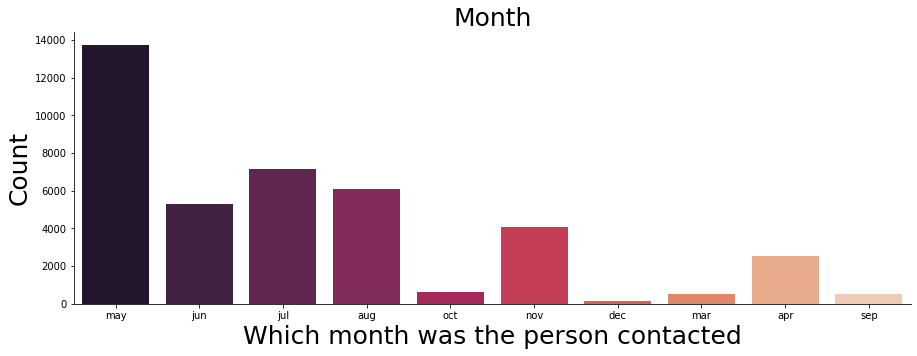

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'month',  palette="rocket", data = bank2)
ax.set_xlabel('Which month was the person contacted', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('Month', fontsize=25)
sns.despine()

In [46]:
labelencoder_X.fit(bank2['month'])
bank2['month'] = labelencoder_X.transform(bank2['month'])
bank2.tail(20)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41166,1,0,1,6,0,0,0,1,7,wed,...,1,999,1,failure,-1.1,94.767,-50.8,1.030,4963.6,yes
41167,1,0,1,6,0,2,0,0,7,wed,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
41168,1,2,1,6,0,0,0,0,7,wed,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
41169,1,7,1,3,0,2,0,0,7,wed,...,5,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
41170,1,4,0,6,0,2,0,0,7,wed,...,2,999,4,failure,-1.1,94.767,-50.8,1.030,4963.6,no
41171,1,8,1,5,0,2,0,1,7,thu,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes
41172,1,0,2,6,0,2,0,0,7,thu,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes
41173,1,5,1,6,0,2,0,0,7,thu,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41174,1,5,1,6,0,2,0,0,7,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41175,1,8,2,7,0,2,0,0,7,thu,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,no


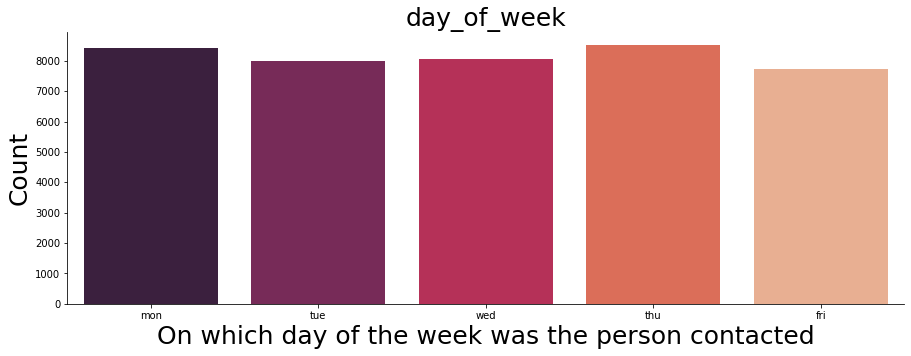

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'day_of_week',  palette="rocket", data = bank2)
ax.set_xlabel('On which day of the week was the person contacted', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('day_of_week', fontsize=25)
sns.despine()

In [48]:
labelencoder_X.fit(bank2['day_of_week'])
bank2['day_of_week'] = labelencoder_X.transform(bank2['day_of_week'])
bank2.tail(20)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41166,1,0,1,6,0,0,0,1,7,4,...,1,999,1,failure,-1.1,94.767,-50.8,1.030,4963.6,yes
41167,1,0,1,6,0,2,0,0,7,4,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
41168,1,2,1,6,0,0,0,0,7,4,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
41169,1,7,1,3,0,2,0,0,7,4,...,5,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
41170,1,4,0,6,0,2,0,0,7,4,...,2,999,4,failure,-1.1,94.767,-50.8,1.030,4963.6,no
41171,1,8,1,5,0,2,0,1,7,2,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes
41172,1,0,2,6,0,2,0,0,7,2,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,yes
41173,1,5,1,6,0,2,0,0,7,2,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,yes
41174,1,5,1,6,0,2,0,0,7,2,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41175,1,8,2,7,0,2,0,0,7,2,...,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,no


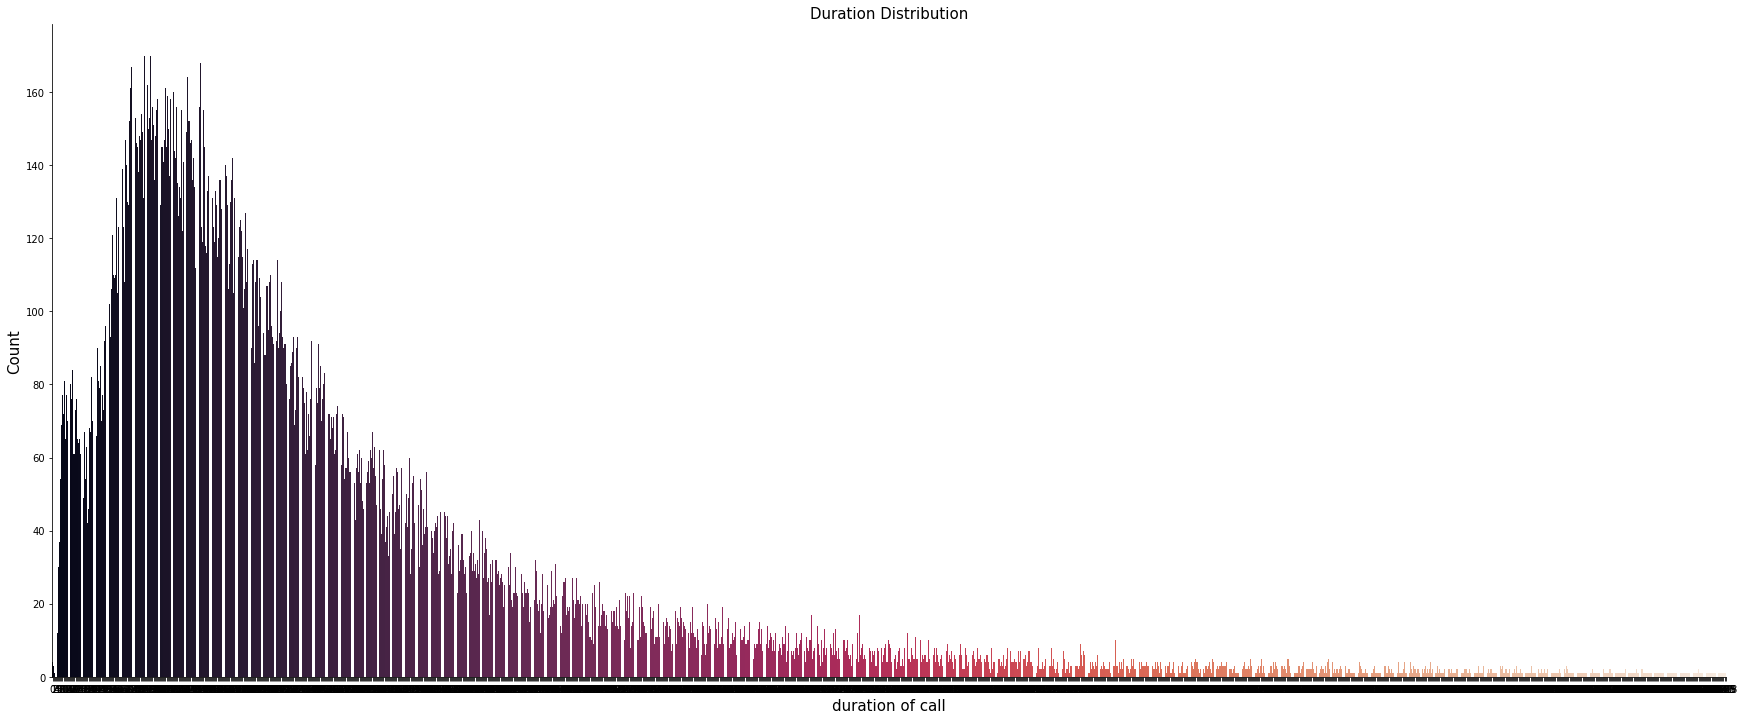

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
sns.countplot(x = 'duration',  palette="rocket", data = bank)
ax.set_xlabel('duration of call', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Duration Distribution', fontsize=15)
sns.despine()

In [50]:
def remove_outlier_upper(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > 0) & (df_in[col_name] < fence_high)]
    print('IQR lower bound and upper bound are 0 and', fence_high, 'respectively')
    return df_out
bank2= remove_outlier_upper(bank2, 'duration')

IQR lower bound and upper bound are 0 and 644.5 respectively


In [51]:
bank2['duration'].head()

0    261
1    149
2    226
3    151
4    307
Name: duration, dtype: int64

In [52]:
#function to creat group of duration, this helps because we a lot of values
bank2= bank2.copy()
def duration(dataframe):
    q1 = dataframe['duration'].quantile(0.25)
    q2 = dataframe['duration'].quantile(0.50)
    q3 = dataframe['duration'].quantile(0.75)
    dataframe.loc[(dataframe['duration'] <= q1), 'duration'] = 1
    dataframe.loc[(dataframe['duration'] > q1) & (dataframe['duration'] <= q2), 'duration'] = 2
    dataframe.loc[(dataframe['duration'] > q2) & (dataframe['duration'] <= q3), 'duration'] = 3
    dataframe.loc[(dataframe['duration'] > q3), 'duration'] = 4 
    print (q1, q2, q3)
    return dataframe
duration(bank2)

bank2['duration'].head(10)

97.0 166.0 277.0


0    3
1    2
2    3
3    2
4    4
5    3
6    2
7    3
8    4
9    1
Name: duration, dtype: int64

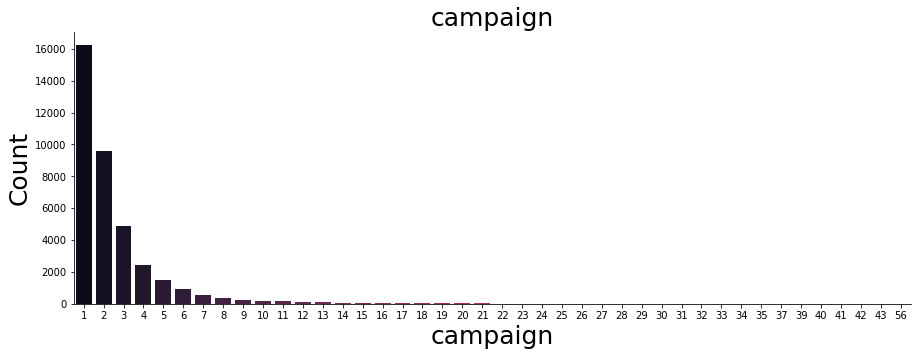

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'campaign',  palette="rocket", data = bank2)
ax.set_xlabel('campaign', fontsize=25)
ax.set_ylabel('Count', fontsize=25)
ax.set_title('campaign', fontsize=25)
sns.despine()

In [54]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > 0) & (df_in[col_name] < fence_high)]
    print('IQR lower bound and upper bound are 0 and', fence_high, 'respectively')
    return df_out
bank2= remove_outlier(bank2, 'campaign')

IQR lower bound and upper bound are 0 and 6.0 respectively


In [55]:
len(bank2)

34631

In [56]:
bank2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,3,1,0,0,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,7,1,3,1,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,1,7,1,3,0,2,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,1,0,1,1,0,0,0,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,1,7,1,3,0,0,2,1,6,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [57]:
bank2['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [58]:
bank2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,1,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,1,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,1,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,1,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [59]:
print(bank2['pdays'].unique())


[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  27  20  19]


In [60]:
bank2.loc[(bank2['pdays'] == 999), 'pdays'] = 1
bank2.loc[(bank2['pdays'] > 0) & (bank2['pdays'] <= 10), 'pdays'] = 2
bank2.loc[(bank2['pdays'] > 10) & (bank2['pdays'] <= 20), 'pdays'] = 3
bank2.loc[(bank2['pdays'] > 20) & (bank2['pdays'] != 999), 'pdays'] = 4 
bank2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,3,1,0,0,0,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,1,7,1,3,1,0,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,1,7,1,3,0,2,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,1,0,1,1,0,0,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,1,7,1,3,0,0,2,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [61]:
print(bank2['emp.var.rate'].unique())

[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]


In [62]:
print(bank2['cons.price.idx'].unique())

[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]


In [63]:
print(bank2['cons.conf.idx'].unique())

[-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]


In [64]:
print(bank2['euribor3m'].unique())

[4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 4.12  4.076
 4.021 3.901 3.879 3.853 3.816 3.743 3.669 3.563 3.488 3.428 3.329 3.282
 3.053 1.811 1.799 1.778 1.757 1.726 1.703 1.687 1.663 1.65  1.64  1.629
 1.614 1.602 1.584 1.574 1.56  1.556 1.548 1.538 1.531 1.52  1.51  1.498
 1.483 1.479 1.466 1.453 1.445 1.435 1.423 1.415 1.41  1.405 1.406 1.4
 1.392 1.384 1.372 1.365 1.354 1.344 1.334 1.327 1.313 1.299 1.291 1.281
 1.266 1.25  1.244 1.259 1.264 1.27  1.262 1.26  1.268 1.286 1.252 1.235
 1.224 1.215 1.206 1.099 1.085 1.072 1.059 1.048 1.044 1.029 1.018 1.007
 0.996 0.979 0.969 0.944 0.927 0.921 0.914 0.908 0.899 0.884 0.883 0.881
 0.879 0.873 0.869 0.861 0.859 0.854 0.851 0.849 0.843 0.838 0.834 0.829
 0.825 0.821 0.819 0.813 0.809 0.803 0.797 0.788 0.781 

In [65]:
bank2.loc[(bank2['euribor3m'] < 1), 'euribor3m'] = 1
bank2.loc[(bank2['euribor3m'] > 1) & (bank2['euribor3m'] <= 2), 'euribor3m'] = 2
bank2.loc[(bank2['euribor3m'] > 2) & (bank2['euribor3m'] <= 3), 'euribor3m'] = 3
bank2.loc[(bank2['euribor3m'] > 3) & (bank2['euribor3m'] <= 4), 'euribor3m'] = 4
bank2.loc[(bank2['euribor3m'] > 4), 'euribor3m'] = 5
bank2.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,3,1,0,0,0,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,no
1,1,7,1,3,1,0,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,no
2,1,7,1,3,0,2,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,no
3,1,0,1,1,0,0,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,no
4,1,7,1,3,0,0,2,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,no
5,1,7,1,2,1,0,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,no
6,1,0,1,5,0,0,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,no
7,1,1,1,7,1,0,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,no
8,0,9,2,5,0,2,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,no
9,1,7,2,3,0,2,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,no


In [66]:
bank_final= bank2.copy()
y = bank_final['y']
bank_final.drop(['y'],axis=1,inplace=True)
bank_final.shape

(34631, 20)

In [67]:
# Now lets start applying different models on our data
bank_final.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,3,1,0,0,0,0,1,6,1,3,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0
1,1,7,1,3,1,0,0,1,6,1,2,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0
2,1,7,1,3,0,2,0,1,6,1,3,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0
3,1,0,1,1,0,0,0,1,6,1,2,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0
4,1,7,1,3,0,0,2,1,6,1,4,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.25, random_state = 0)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
# Lets first standardize our data i.e. transform the data in a way that the variance is unitary and that the mean of the series is 0.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
# 1. KNN classifier
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %f" % (k_value, scores.mean()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %f" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(accuracy_score(y_test, knnpred)*100)

In [ ]:
# 2. Logistic regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)

print(accuracy_score(y_test, logpred)*100)

In [ ]:
# 3. Linear classifiers: Support Vector Machines (kernel: sigmoid)

from sklearn.svm import SVC
for this_gamma in [.01, 1.0, 10.0]:
    svc= SVC(kernel = 'sigmoid', gamma= this_gamma)
    svc.fit(X_train, y_train)
    svcpred = svc.predict(X_test)
    print(accuracy_score(y_test, svcpred)*100)

In [ ]:
# 4. Linear classifiers: Support Vector Machines (kernel: Radial Basis Function)

from sklearn.svm import SVC
for this_gamma in [.01, .02, .03, .04, .05, .06, .07, .08, .09, .1, 1.0, 10.0]:
    svc= SVC(kernel = 'rbf', gamma= this_gamma)
    svc.fit(X_train, y_train)
    svcpred = svc.predict(X_test)
    print(this_gamma, accuracy_score(y_test, svcpred)*100)

In [ ]:
# 5. Linear classifiers: Support Vector Machines (kernel: Linear)

from sklearn.svm import SVC
for this_gamma in [.01, 1.0, 10.0]:
    svc= SVC(kernel = 'linear', gamma= this_gamma)
    svc.fit(X_train, y_train)
    svcpred = svc.predict(X_test)
    print(accuracy_score(y_test, svcpred)*100)
# So we learned that value of gamma does not affect the accuracy of SVM when using a Linear kernel

In [ ]:
# 6. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(accuracy_score(y_test, dtreepred)*100)

In [ ]:
# 7. Random Forest Classifier(n=200)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(accuracy_score(y_test, rfcpred)*100)

In [ ]:
# 8. Random Forest Classifier(n=1000)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(accuracy_score(y_test, rfcpred)*100)

In [ ]:
# 9. naive bayes classifier

from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(accuracy_score(y_test, gaussiannbpred)*100)


In [ ]:
# 10. Gradient boosting classifier

from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)

print(accuracy_score(y_test, gbkpred)*100)

In [ ]:
# 11. XGBoost Classifier

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(accuracy_score(y_test, xgbprd)*100)

In [ ]:
# Now lets find the cross validation scores for top 2 classifiers-
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())
print(GBKCV,XGB)

## Fairness

In [69]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [70]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')

In [71]:
def get_fair_metrics_and_plot(data, model, plot=False, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

In [74]:
bank2.loc[bank2['y'] == 'no', 'y'] = 0
bank2.loc[bank2['y'] == 'yes', 'y'] = 1
bank2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,3,1,0,0,0,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,0
1,1,7,1,3,1,0,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,0
2,1,7,1,3,0,2,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,0
3,1,0,1,1,0,0,0,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,0
4,1,7,1,3,0,0,2,1,6,1,...,1,2,0,1,1.1,93.994,-36.4,5.0,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,1,0,1,6,0,2,0,0,7,0,...,1,2,0,1,-1.1,94.767,-50.8,2.0,4963.6,1
41182,1,10,2,0,0,2,0,0,7,0,...,1,2,1,3,-1.1,94.767,-50.8,2.0,4963.6,0
41184,1,1,1,5,0,0,0,0,7,0,...,1,2,0,1,-1.1,94.767,-50.8,2.0,4963.6,0
41185,1,5,1,6,0,2,0,0,7,0,...,2,2,0,1,-1.1,94.767,-50.8,2.0,4963.6,0


In [75]:
#print(X)


#combine_final = [train_df, test_df]
#result = pd.concat(combine_final)
#print(result.ifany())
#print(result)
privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]
dataset_orig = StandardDataset(bank2,
                                  label_name='y',
                                  protected_attribute_names=['age'],
                                  favorable_classes=[1],
                                  privileged_classes=[[1]])

#metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
#                                             unprivileged_groups=unprivileged_groups,
#                                             privileged_groups=privileged_groups)
#display(Markdown("#### Original training dataset"))
#print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())


In [76]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = 0.139461


In [77]:
import ipynbname
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
X_train = data_orig_train.features
y_train = data_orig_train.labels.ravel()

X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()

num_estimators = 100

model = RandomForestClassifier(n_estimators = 100)

mdl = model.fit(X_train, y_train)
with open('../../Results/RF/' + nb_fname + '.pkl', 'wb') as f:
        pickle.dump(mdl, f)

with open('../../Results/RF/' + nb_fname + '_Train' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_train, f) 
    
with open('../../Results/RF/' + nb_fname + '_Test' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_test, f) 

In [78]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
f1= []

for i in range(1,num_estimators+1):
    
    model = RandomForestClassifier(n_estimators=i)
    
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)                           
    fair_list = fair.iloc[1].tolist()
    fair_list.insert(0, i)
    final_metrics.append(fair_list)


In [79]:
import numpy as np
final_result = pd.DataFrame(final_metrics)
print(final_result)
final_result[4] = np.log(final_result[4])
final_result = final_result.transpose()
final_result.loc[0] = f1  # add f1 and acc to df
acc = pd.DataFrame(accuracy).transpose()
acc = acc.rename(index={0: 'accuracy'})
final_result = pd.concat([acc,final_result])
final_result = final_result.rename(index={0: 'f1', 1: 'statistical_parity_difference', 2: 'equal_opportunity_difference', 3: 'average_abs_odds_difference', 4: 'disparate_impact', 5: 'theil_index'})
final_result.columns = ['T' + str(col) for col in final_result.columns]
final_result.insert(0, "classifier", final_result['T' + str(num_estimators - 1)])   ##Add final metrics add the beginning of the df
final_result.to_csv('../../Results/RF/' + nb_fname + '.csv')
final_result

      0         1         2         3         4         5
0     1  0.113001  0.121951  0.090868  2.574230  0.068712
1     2  0.029094 -0.041812  0.026486  1.731974  0.072548
2     3  0.110041  0.069948  0.066131  2.722843  0.062352
3     4  0.045691 -0.023258  0.019804  2.017892  0.065872
4     5  0.106813  0.037456  0.050746  2.682728  0.060690
..  ...       ...       ...       ...       ...       ...
95   96  0.102865  0.102787  0.071538  2.818841  0.056955
96   97  0.091600  0.062195  0.048969  2.608406  0.056716
97   98  0.097956  0.113328  0.071886  2.693559  0.056417
98   99  0.102272  0.119425  0.077315  2.789579  0.056891
99  100  0.082510  0.080488  0.051458  2.495533  0.058034

[100 rows x 6 columns]


,classifier,T0,T1,T2,T3,T4,T5,T6,T7,T8,...,T90,T91,T92,T93,T94,T95,T96,T97,T98,T99
accuracy,0.929933,0.905967,0.917902,0.919153,0.924447,0.921752,0.927045,0.925890,0.925505,0.924639,...,0.931088,0.930221,0.930029,0.930703,0.931954,0.930510,0.930799,0.930703,0.930318,0.929933
f1,0.505435,0.408953,0.342328,0.464968,0.420664,0.480511,0.464689,0.498044,0.447932,0.489237,...,0.522029,0.515050,0.516301,0.518072,0.527722,0.516086,0.518419,0.521277,0.516689,0.505435
statistical_parity_difference,0.082510,0.113001,0.029094,0.110041,0.045691,0.106813,0.069437,0.121045,0.074543,0.109977,...,0.105994,0.113735,0.090611,0.106389,0.106093,0.102865,0.091600,0.097956,0.102272,0.082510
equal_opportunity_difference,0.080488,0.121951,-0.041812,0.069948,-0.023258,0.037456,0.037544,0.106446,0.036760,0.095906,...,0.114547,0.121864,0.099129,0.100348,0.071516,0.102787,0.062195,0.113328,0.119425,0.080488
average_abs_odds_difference,0.051458,0.090868,0.026486,0.066131,0.019804,0.050746,0.030686,0.084905,0.034893,0.074659,...,0.077418,0.085568,0.062298,0.072645,0.060824,0.071538,0.048969,0.071886,0.077315,0.051458
disparate_impact,0.914502,0.945551,0.549262,1.001677,0.702054,0.986834,0.869272,1.103123,0.929157,1.037964,...,1.050095,1.102284,0.941527,1.057052,1.051830,1.036326,0.958739,0.990863,1.025891,0.914502
theil_index,0.058034,0.068712,0.072548,0.062352,0.065872,0.060690,0.061967,0.058820,0.063539,0.059740,...,0.056344,0.057060,0.056929,0.056751,0.055762,0.056955,0.056716,0.056417,0.056891,0.058034
